In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qadence import *

import torch
from torch.autograd import grad

### Hyperparams

In [2]:
RANDOM_STATES = [42, 1615956328, 247970482, 89419800, 71286725, 313474683, 264278394, 1471746552, 2002605652, 1217919795] #np.random.randint(0, 2**31-1, size=10) 
print("Seeds: ", RANDOM_STATES)
LEARNING_RATES = [0.1] 
K= [1] 
LAMBDA = [10] 

Seeds:  [42, 1615956328, 247970482, 89419800, 71286725, 313474683, 264278394, 1471746552, 2002605652, 1217919795]


### Inputs

In [3]:
def generate_chebyshev_grid(n, a, b, requires_grad=True): 
    k = torch.arange(n)
    chebyshev_nodes = torch.cos(torch.pi * (2*k + 1) / (2*n))  #standard Chebyshev nodes in [-1,1]
    scaled_nodes = ((chebyshev_nodes + 1) / 2) * (b - a) + a  #rescale to [a, b]
    
    return scaled_nodes.requires_grad_(requires_grad=requires_grad)

# X train
N_POINTS = 20
a = 0.0
b = 0.9
x = generate_chebyshev_grid(N_POINTS, a, b)
print(x.detach().numpy())
cp_fixed = torch.reshape(x, (N_POINTS,1))

# X test
sample_points = generate_chebyshev_grid(100, a, b, requires_grad=False).reshape(-1, 1)

[0.8986128  0.88756646 0.86574579 0.83368807 0.79218268 0.74225162
 0.68512435 0.62220754 0.55505041 0.48530659 0.41469341 0.34494959
 0.27779246 0.21487565 0.15774838 0.10781732 0.06631193 0.03425421
 0.01243354 0.0013872 ]


### Pseudo-Exhaustive search

Seed id:  0
Learning rate:  0.1
k = 1
lamb = 10
Initial angles:  [0.05815449 0.47678475 0.1570535  0.61243659 0.07473488 0.04036647
 0.25185522 0.59777135 0.93429881 0.84563053 0.70931952 0.99843565
 0.06291017 0.9552357  0.37536703 0.08810978 0.68343022 0.93190879
 0.23340819 0.84900285 0.12231294 0.38427802 0.47202752 0.23263911
 0.12358607 0.92875258 0.84251973 0.70118189 0.31223868 0.15212583
 0.2256651  0.03249561 0.42769536 0.09930668 0.09382696 0.37290503
 0.05258016 0.08354337 0.87050104 0.62340308 0.30905878 0.26504491
 0.3175678  0.30924379 0.28818388 0.66264799 0.60641381 0.62548492
 0.5261719  0.13264067 0.37753296 0.437279   0.03134017 0.13043349
 0.61440828 0.43230375 0.98140105 0.58193447 0.49915205 0.27650826]
0 (67.75665502979116, 2.563701312723427)
1 (18.71691334045203, 0.9720037631265456)
2 (11.012923203049416, 0.3716756748312161)
3 (10.990543830012278, 0.26891875983450164)
4 (9.78498754489344, 0.2935818431554882)
5 (8.051594672113879, 0.360117549700037)
6 (7.2847955

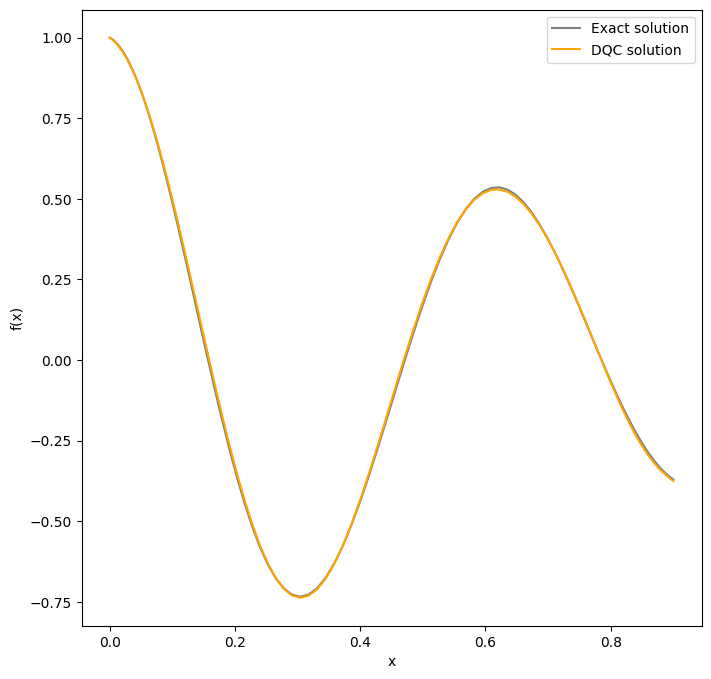

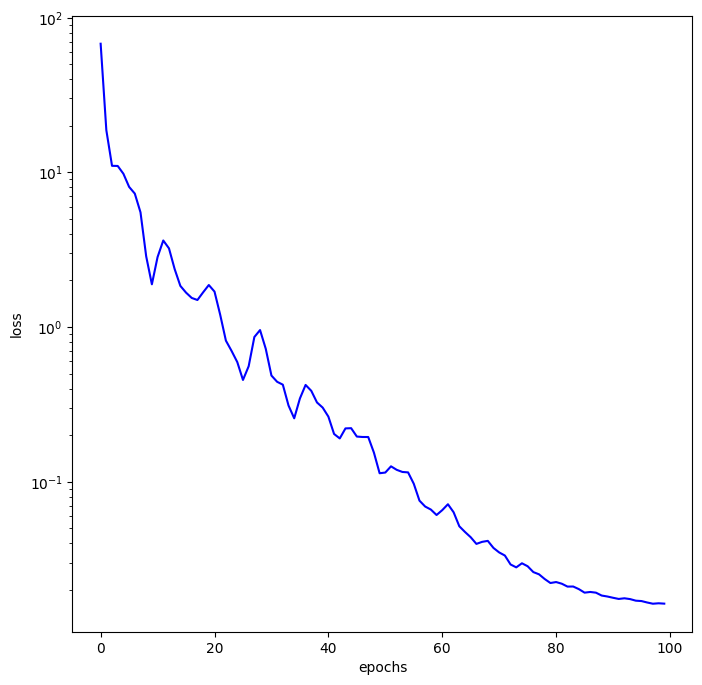

Seed id:  1
Learning rate:  0.1
k = 1
lamb = 10
Initial angles:  [0.11509135 0.84476366 0.46135441 0.43361597 0.3446643  0.93361481
 0.77610958 0.09533286 0.00579951 0.12460364 0.73850549 0.40733067
 0.28251609 0.02221115 0.85214649 0.37286309 0.98268494 0.59257332
 0.79167513 0.72483418 0.21620766 0.4637544  0.9475362  0.40394903
 0.49609575 0.56844783 0.43069277 0.94530719 0.2461782  0.24329929
 0.62499483 0.44485212 0.65812981 0.49045403 0.14480101 0.39488467
 0.86274192 0.87198031 0.13426407 0.27314747 0.64765497 0.28262508
 0.55441653 0.10306715 0.8288722  0.73800719 0.26324939 0.21707576
 0.18785561 0.2735772  0.3949415  0.15061303 0.63929503 0.3805877
 0.4763519  0.94480491 0.84030487 0.36073963 0.10958308 0.97409851]
0 (62.412765313714814, 1.1259364091676256)
1 (14.032516667776843, 0.5210322329480696)
2 (4.555124238833292, 0.16802988544329994)
3 (2.426704272643716, 0.026358374192608246)
4 (3.2010811498074334, 0.03692447842371802)
5 (3.741759895013492, 0.03795000614873771)
6 (3.

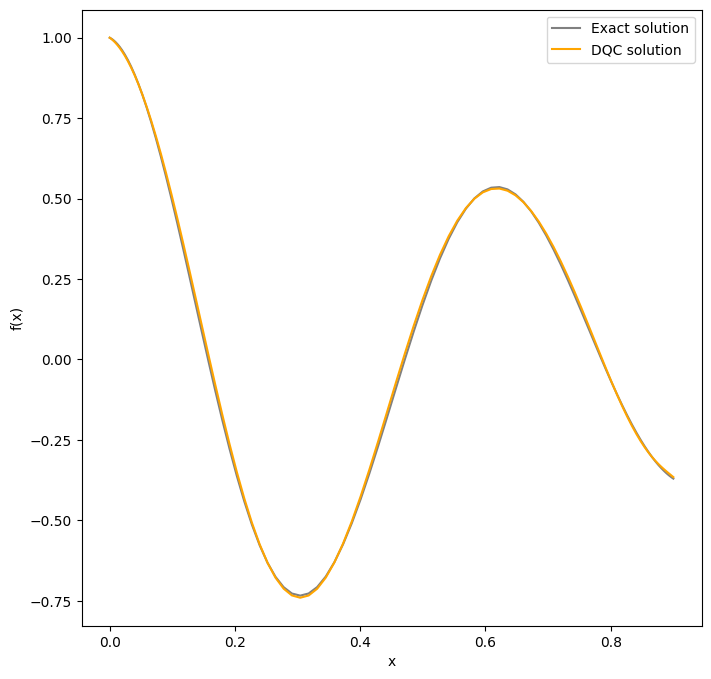

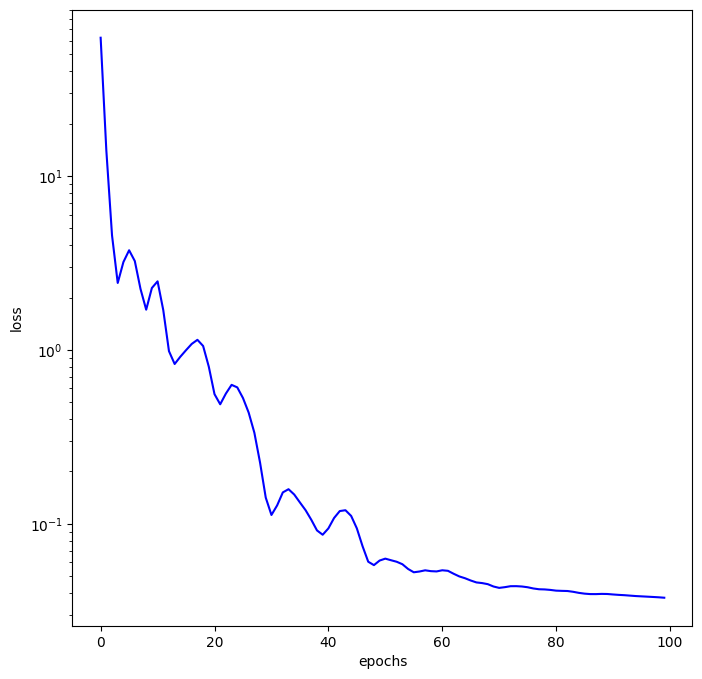

Seed id:  2
Learning rate:  0.1
k = 1
lamb = 10
Initial angles:  [0.18543459 0.40759255 0.54736705 0.71215064 0.07896078 0.9677477
 0.94904842 0.35372556 0.51471923 0.37914975 0.86220543 0.42840841
 0.03539684 0.04606304 0.8204543  0.82476533 0.1878618  0.93860961
 0.50565552 0.23660133 0.24756854 0.81384159 0.29745984 0.87796002
 0.64924297 0.93204042 0.1211122  0.85068359 0.06567063 0.66971514
 0.09977123 0.27738367 0.3528282  0.00545275 0.98279899 0.0176442
 0.41525635 0.5251464  0.86941313 0.3206495  0.3750638  0.34957733
 0.12041333 0.094748   0.70064422 0.56762342 0.08823585 0.62323401
 0.74472979 0.32058252 0.83775331 0.48395001 0.59880521 0.58786968
 0.11960008 0.37695798 0.15404954 0.70119215 0.18725486 0.10424369]
0 (83.47197608757976, 2.2205738742633896)
1 (28.105066366557867, 1.8221504019521404)
2 (14.338142228912227, 1.7145131768501585)
3 (12.855554355935743, 1.4451372345422995)
4 (9.9706406924547, 1.1280817418414866)
5 (7.666062171731015, 0.7223419992900487)
6 (5.36500920

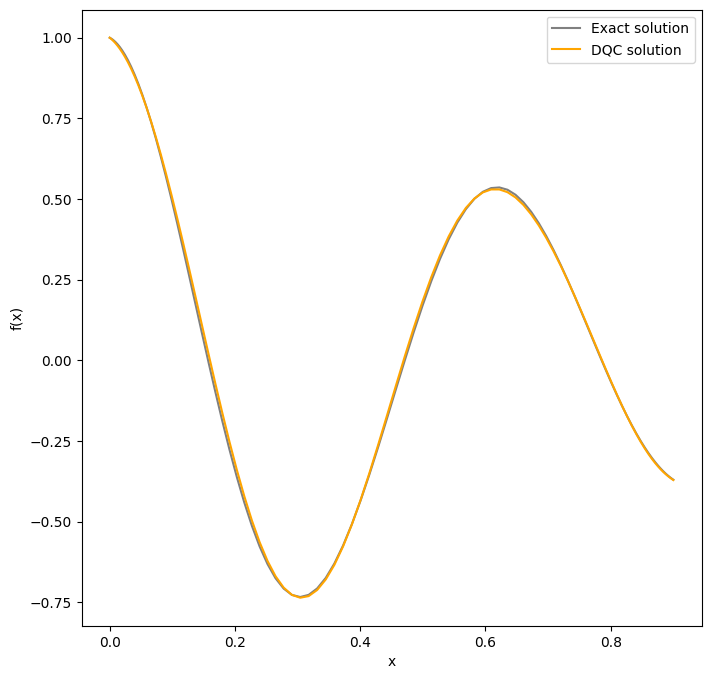

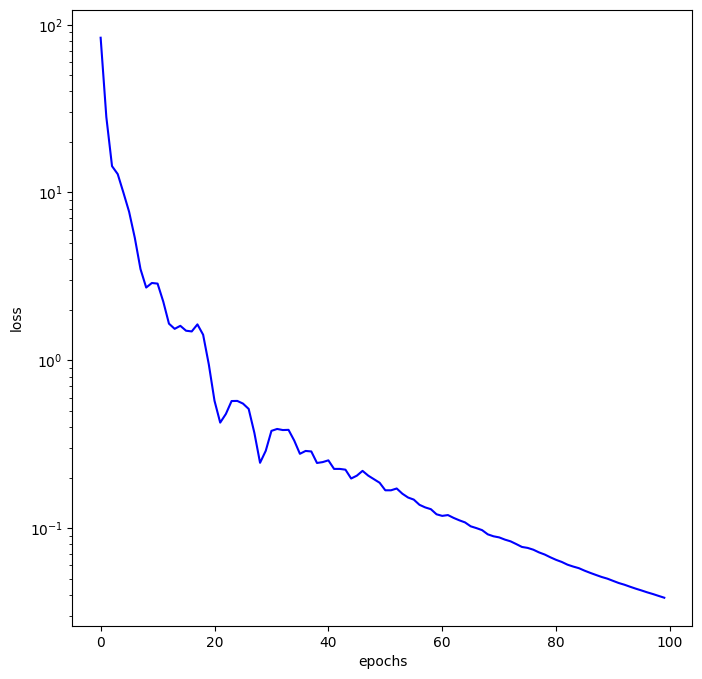

Seed id:  3
Learning rate:  0.1
k = 1
lamb = 10
Initial angles:  [0.14955737 0.30849328 0.40781469 0.97864406 0.7896882  0.13680561
 0.89832511 0.8380745  0.73294335 0.36969264 0.84043938 0.83726176
 0.74109475 0.75213325 0.07860108 0.54676922 0.84832804 0.14206504
 0.77252579 0.2823829  0.57925068 0.08120235 0.87418612 0.35775972
 0.23716249 0.58023792 0.80180799 0.74318754 0.33223548 0.28280992
 0.66456656 0.78596544 0.35230495 0.18223874 0.05595652 0.29864765
 0.30781149 0.02271131 0.82708304 0.37050175 0.83448058 0.82521946
 0.75364427 0.42495514 0.46843361 0.99286328 0.22829485 0.11604265
 0.84528484 0.86004572 0.09256043 0.12615771 0.00769417 0.93797301
 0.38263329 0.0526717  0.55925565 0.9366194  0.30935293 0.88598744]
0 (68.57325481238965, 4.5425159199861955)
1 (27.33927427270629, 2.098343979281052)
2 (12.240923865146806, 0.7598284410613256)
3 (9.919982954472932, 0.3108545263530452)
4 (10.090740941563569, 0.23599744521517324)
5 (9.778332137467443, 0.24787796411116142)
6 (8.4924

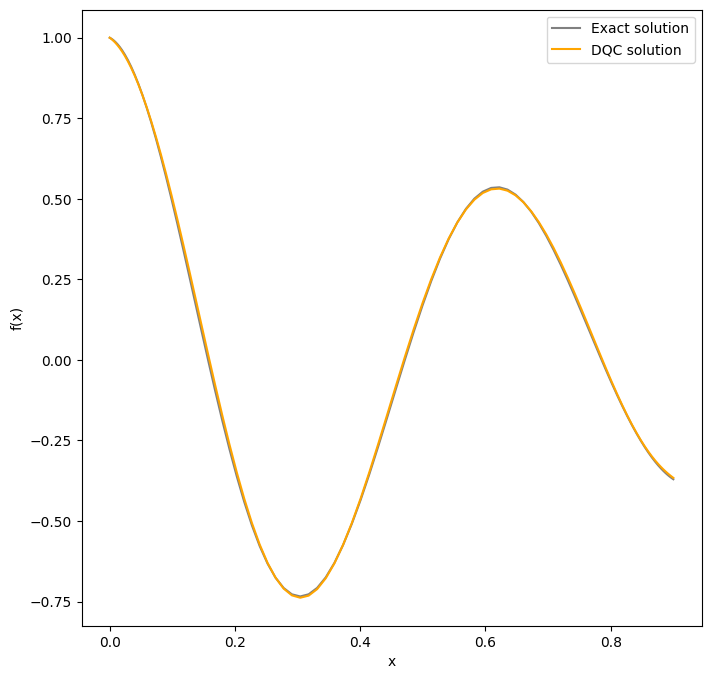

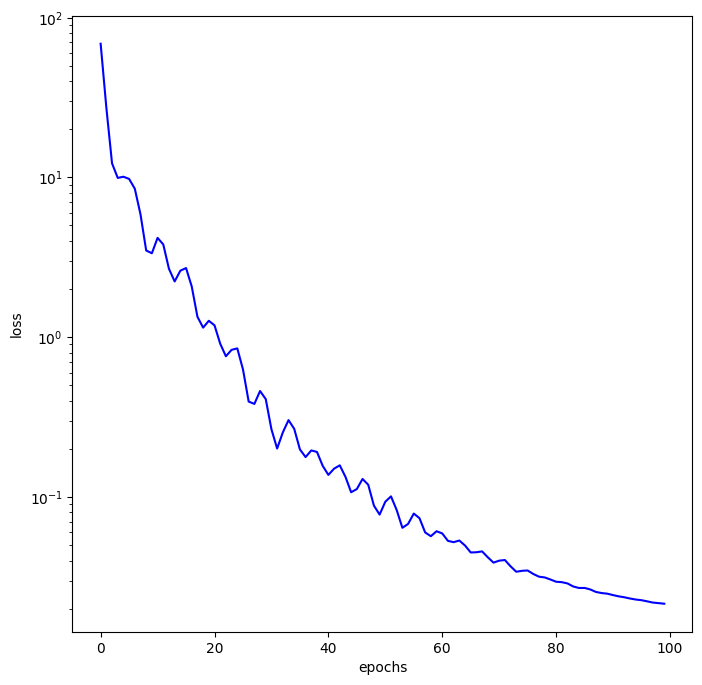

Seed id:  4
Learning rate:  0.1
k = 1
lamb = 10
Initial angles:  [0.01144863 0.45162154 0.44377559 0.65013821 0.16457535 0.87431383
 0.35946564 0.80011655 0.83891316 0.79351312 0.09810659 0.85951587
 0.52490841 0.25126531 0.91718642 0.99718627 0.99156375 0.52044039
 0.02367252 0.86074206 0.97342322 0.94337906 0.78627729 0.2386561
 0.22999381 0.13576491 0.41434199 0.51409631 0.35296369 0.13684084
 0.47427591 0.88709095 0.17402503 0.43807158 0.22012851 0.685699
 0.32699566 0.9436568  0.20732145 0.73889191 0.73413531 0.30243736
 0.1383988  0.31978545 0.11298668 0.65576204 0.47966226 0.6278591
 0.36988973 0.14771987 0.49203089 0.21070289 0.73878448 0.96199752
 0.64274834 0.34863422 0.94829407 0.04090451 0.33572777 0.8601921 ]
0 (91.00390578988507, 3.2075363716193266)
1 (26.682824571860863, 1.0043547947041427)
2 (5.158181744119693, 0.44697001585129686)
3 (7.246358439657927, 0.6945307550119025)
4 (10.196649552247738, 0.7951177892368222)
5 (8.269752858862981, 0.5562355598105985)
6 (4.72509482

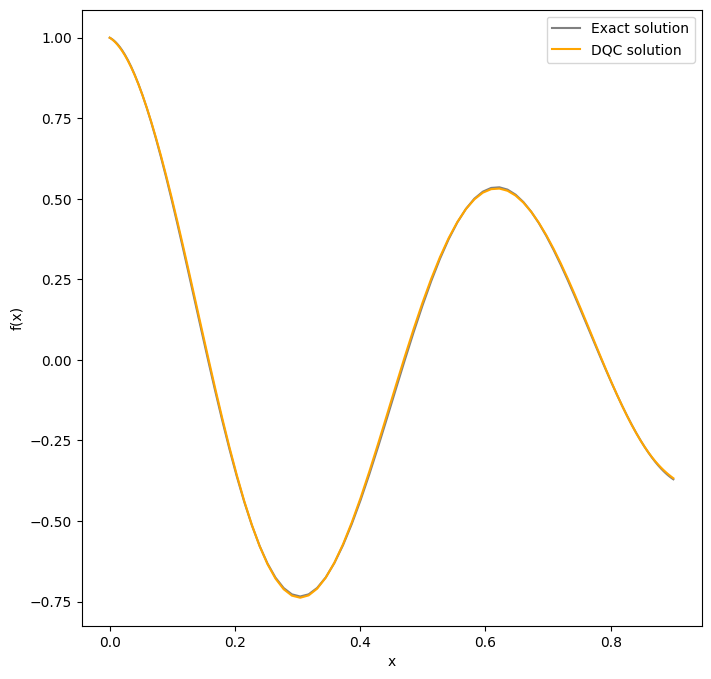

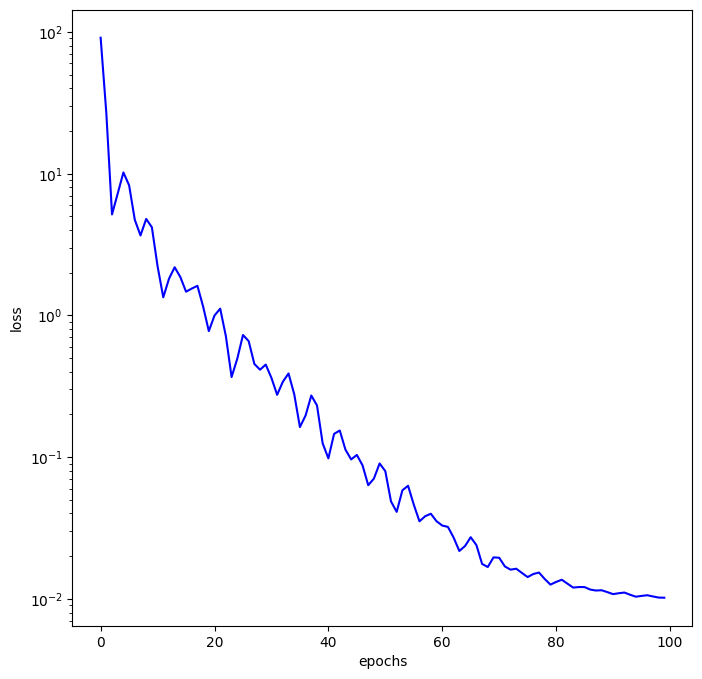

Seed id:  5
Learning rate:  0.1
k = 1
lamb = 10
Initial angles:  [0.43291866 0.16314887 0.01629386 0.44500835 0.52729684 0.33072243
 0.42137721 0.26703816 0.24406507 0.06281304 0.32324787 0.34011465
 0.98902545 0.46336125 0.50043845 0.52730087 0.46904019 0.12031017
 0.42838109 0.79713795 0.73282948 0.93708863 0.26742839 0.62748154
 0.49336984 0.77769275 0.90843623 0.77300649 0.00346304 0.0777357
 0.83997141 0.71376219 0.82897069 0.30994236 0.48936239 0.80401735
 0.65260265 0.77938046 0.92308515 0.59293226 0.96763564 0.45694715
 0.50990407 0.09267807 0.5025359  0.1428678  0.97251022 0.63360066
 0.89932474 0.44388887 0.0969     0.13703568 0.65233062 0.53610791
 0.62632632 0.7190328  0.34934595 0.30821109 0.51412303 0.02843548]
0 (85.88459691827177, 6.5743923586995505)
1 (40.4548365215926, 4.048118129173576)
2 (21.263546929132787, 1.8324243115515124)
3 (12.027817749446472, 0.7525494648032455)
4 (6.762878270579319, 0.24704088513418437)
5 (4.193386414116608, 0.045989106132779255)
6 (3.84060

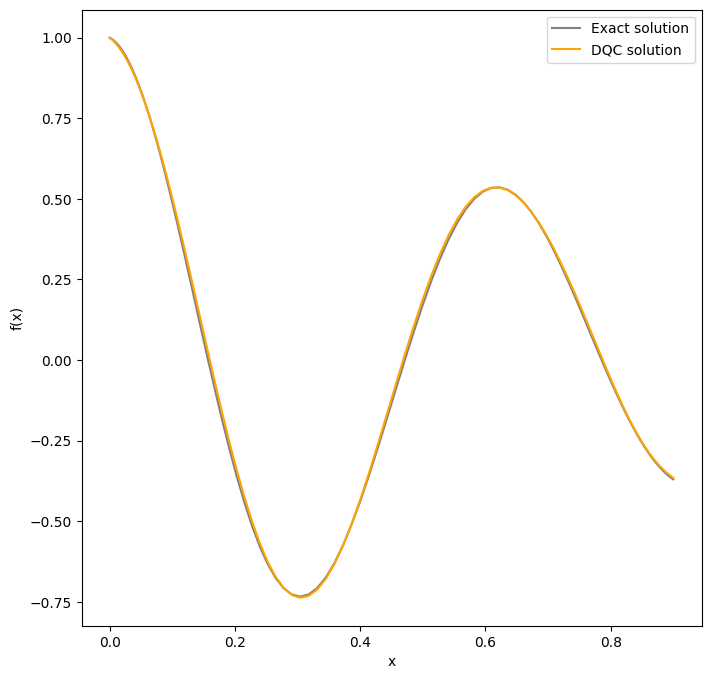

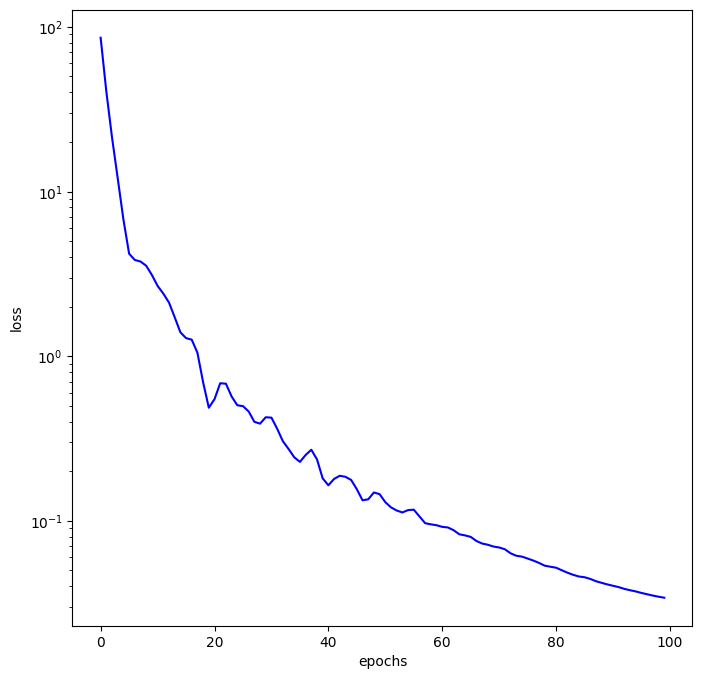

Seed id:  6
Learning rate:  0.1
k = 1
lamb = 10
Initial angles:  [0.61236479 0.99084521 0.69525775 0.20098326 0.25997864 0.08675011
 0.32675189 0.27923198 0.19531128 0.06386321 0.48122201 0.33819473
 0.20073101 0.18242121 0.13230375 0.577234   0.45485848 0.26990232
 0.78407714 0.95753742 0.71149348 0.98550134 0.50493969 0.47980774
 0.75221101 0.08712688 0.62400456 0.58639154 0.20287378 0.44073906
 0.63367224 0.15268244 0.88098655 0.04111769 0.21857447 0.84073024
 0.83517844 0.06749112 0.78196257 0.41245735 0.20298523 0.41123077
 0.2786114  0.57720752 0.49506819 0.95006932 0.06692582 0.28921223
 0.20572468 0.48805777 0.39101331 0.72285875 0.69377064 0.972317
 0.56199419 0.56992899 0.23905517 0.82398318 0.35643625 0.51232598]
0 (49.39805615598739, 0.6517858835811176)
1 (17.058109089959682, 0.2643146496179454)
2 (11.5743114246164, 0.2843622472814448)
3 (9.629796305906302, 0.3383686212810407)
4 (6.561987713275878, 0.268190800399283)
5 (3.836019057375862, 0.13930842198169607)
6 (3.005080825

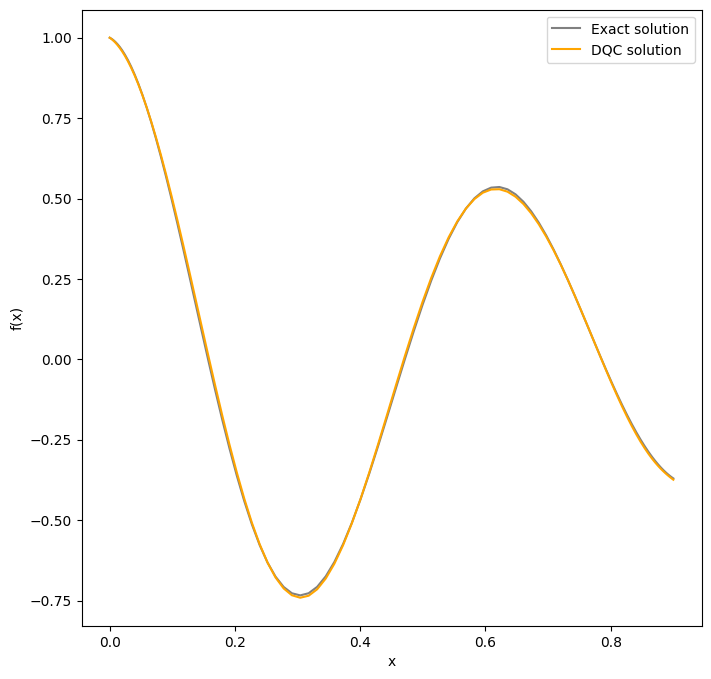

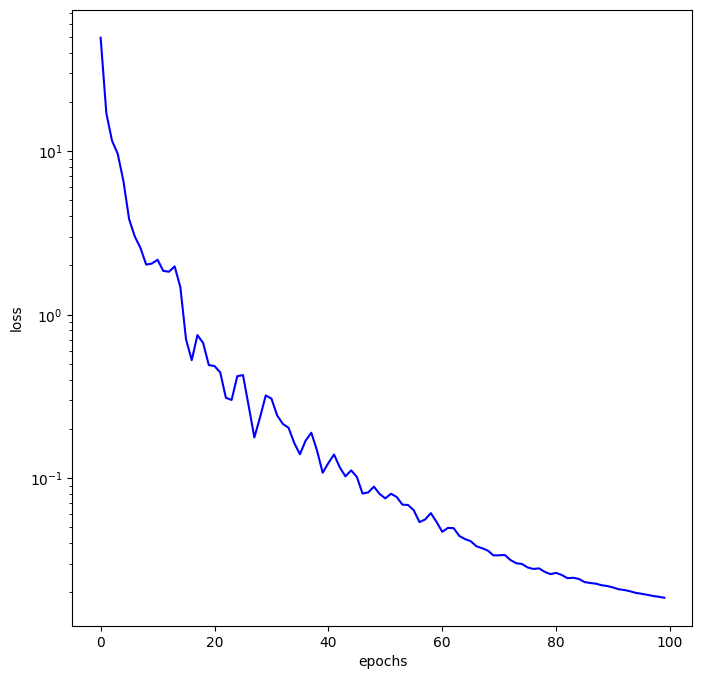

Seed id:  7
Learning rate:  0.1
k = 1
lamb = 10
Initial angles:  [0.33676676 0.69949414 0.30127704 0.11884874 0.57075881 0.49503674
 0.86223527 0.82941054 0.79222042 0.21670229 0.39721857 0.83730837
 0.93904208 0.80786703 0.54396546 0.32782149 0.14013248 0.46253038
 0.02333672 0.60988636 0.86381946 0.45938595 0.81395512 0.04046074
 0.23553773 0.98269615 0.85395614 0.83483707 0.0813939  0.24258044
 0.68376401 0.74222673 0.41346733 0.51966334 0.51996032 0.43511413
 0.01750728 0.94218467 0.18234727 0.39493031 0.28038982 0.39378027
 0.91782463 0.31302281 0.81506172 0.28247162 0.40796064 0.70898334
 0.66629863 0.81297899 0.39843931 0.8194405  0.05708134 0.19621135
 0.3848854  0.96723438 0.63342853 0.67906632 0.27596517 0.37975436]
0 (103.2629148745666, 2.276027759871883)
1 (39.068959734694985, 2.0495010929471347)
2 (19.7496027529752, 1.8681042469579308)
3 (16.267442568330676, 1.397094463771398)
4 (15.553043840830767, 0.9729213043630214)
5 (13.411099876203242, 0.6403562678711235)
6 (10.73861

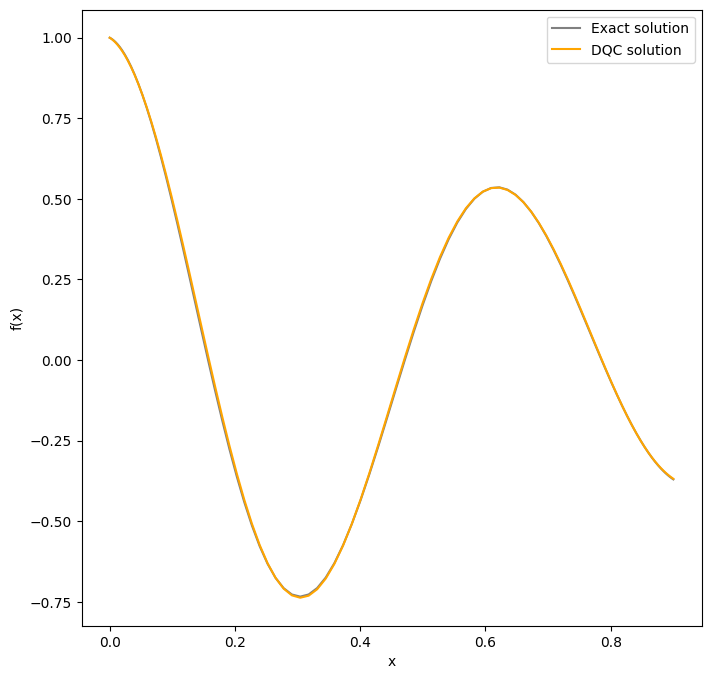

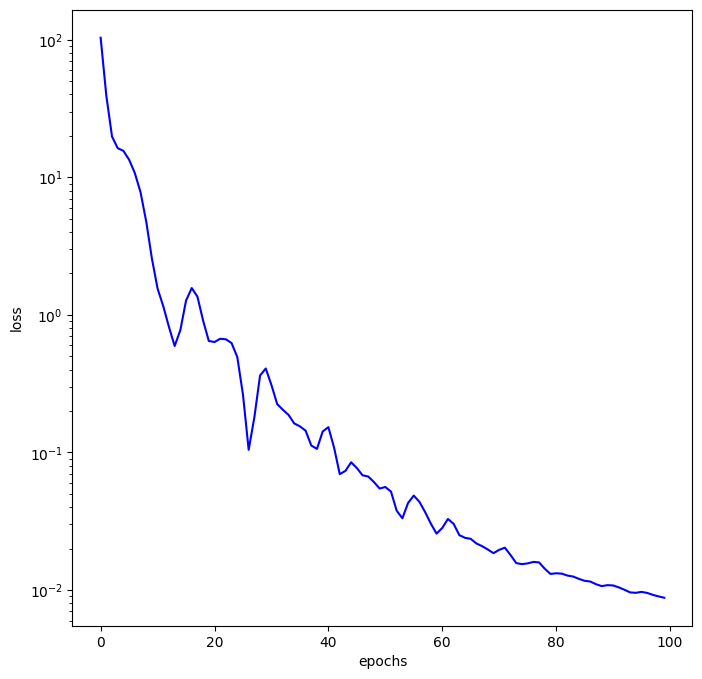

Seed id:  8
Learning rate:  0.1
k = 1
lamb = 10
Initial angles:  [0.87649543 0.23942734 0.27743019 0.46036907 0.01399033 0.57871452
 0.4221048  0.94227938 0.75555805 0.45653748 0.02182469 0.38766836
 0.54475295 0.64640183 0.90265948 0.75126826 0.09447821 0.64208299
 0.17826884 0.15950896 0.03271622 0.84928069 0.87647476 0.42551314
 0.08545954 0.30332641 0.24452496 0.51660805 0.22653744 0.44244748
 0.38943204 0.14171125 0.85175756 0.27093142 0.77990762 0.67505183
 0.36944465 0.91227279 0.34964977 0.75552464 0.15854776 0.37688543
 0.00844621 0.6586386  0.81131395 0.47605927 0.29791087 0.39925645
 0.00160596 0.55573341 0.56836054 0.82305208 0.63489043 0.1177181
 0.16052672 0.84347844 0.78929766 0.69970578 0.62843136 0.75899474]
0 (58.671639634396186, 3.2018530622973307)
1 (19.905477010250195, 1.2359131787545372)
2 (12.943368343107824, 1.144628103568209)
3 (11.593498290449515, 1.1919562928406175)
4 (10.633124125151443, 0.949174720883685)
5 (9.738249640091713, 0.6464216406345518)
6 (7.99610

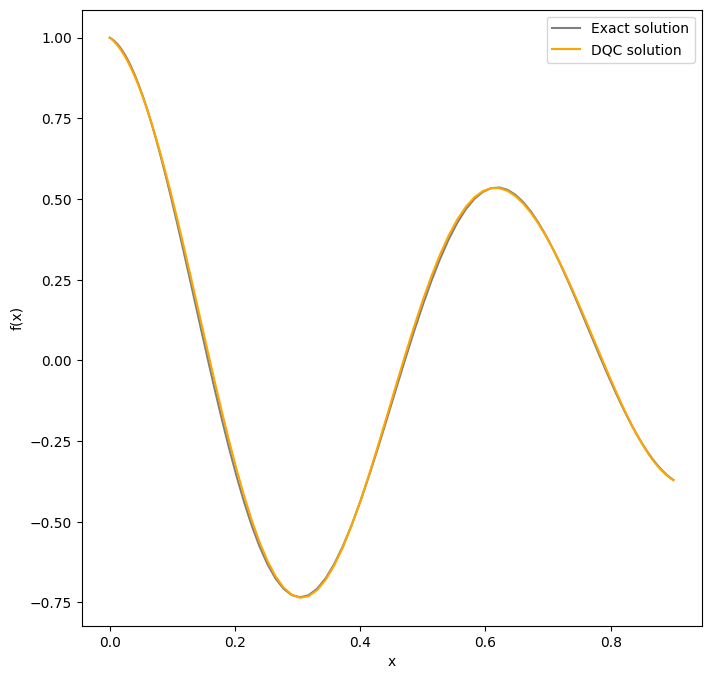

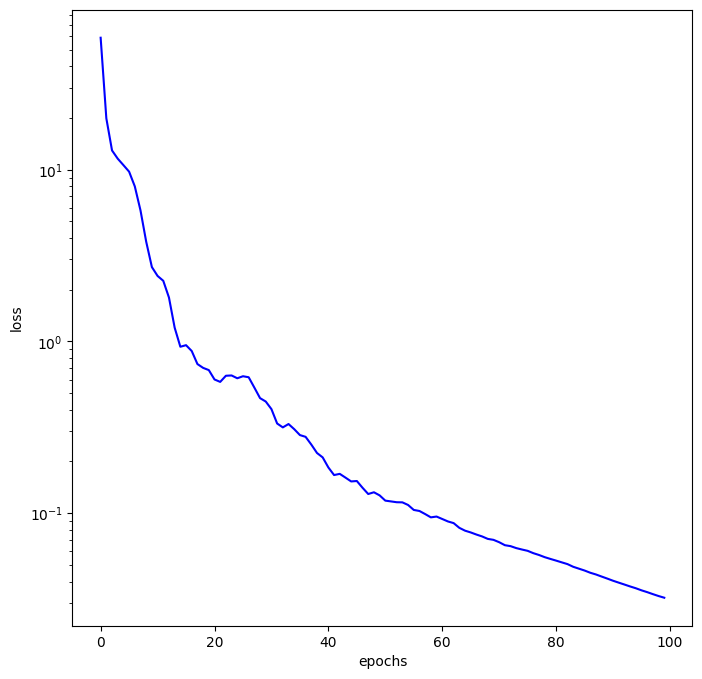

Seed id:  9
Learning rate:  0.1
k = 1
lamb = 10
Initial angles:  [0.35263051 0.44807651 0.59954183 0.6717813  0.74031085 0.17809104
 0.37291713 0.5944617  0.22923709 0.36976253 0.71356206 0.4577813
 0.74430405 0.57784019 0.33583721 0.69818419 0.55516692 0.34085523
 0.91199676 0.81691365 0.98009944 0.2620775  0.0726111  0.97106845
 0.51955865 0.74556338 0.19464458 0.64862331 0.5124692  0.99535738
 0.33240772 0.49390993 0.56552425 0.37701071 0.45870689 0.12443756
 0.4447699  0.06162298 0.5234873  0.60722869 0.12353413 0.90245007
 0.88739048 0.38346711 0.32276369 0.30878435 0.21616677 0.37326777
 0.23399876 0.63559896 0.96539114 0.32012419 0.89650585 0.52888842
 0.28626572 0.83727976 0.29071006 0.10425227 0.57277411 0.54735867]
0 (30.13863756318499, 1.580085282977086)
1 (9.769639135466692, 0.9979566628308831)
2 (6.07761009677761, 0.2778934030253943)
3 (3.7636092312949665, 0.07520747150796209)
4 (3.394958749125886, 0.2039086962719728)
5 (4.1792215149706955, 0.26593099352205696)
6 (3.296292

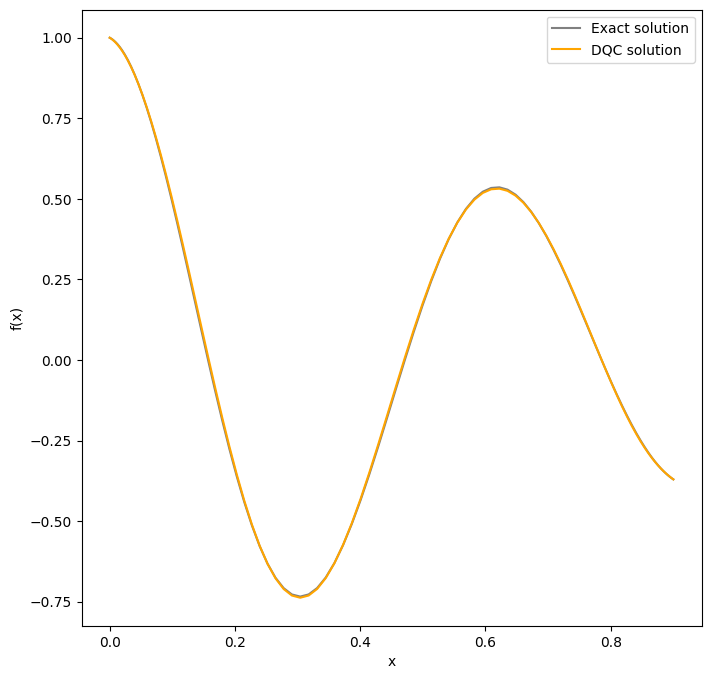

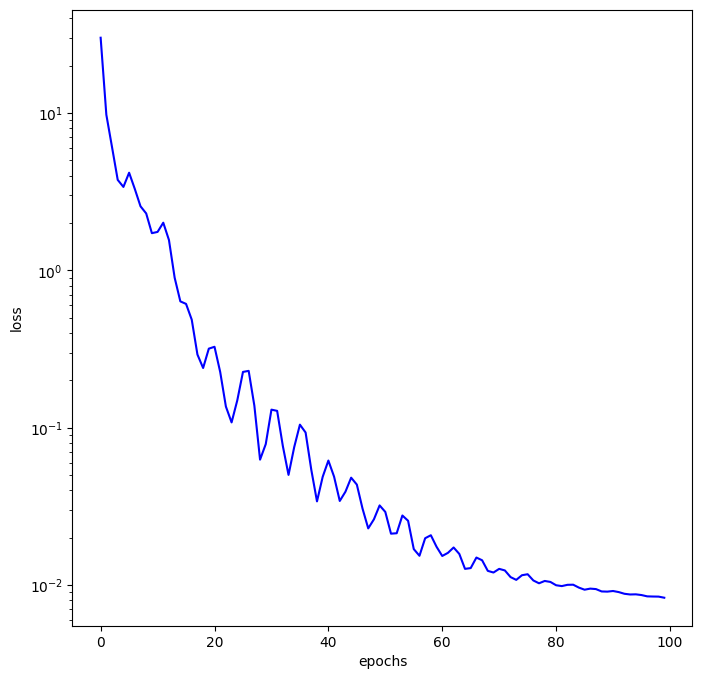

In [4]:
L_f = []
L_q = []
all_functions = []
all_losses = []
for state in range(len(RANDOM_STATES)):
    for lr in LEARNING_RATES:
        for k in K:
            for lamb in LAMBDA:
                print("Seed id: ",state)
                print("Learning rate: ",lr)
                print("k =",k)
                print("lamb =",lamb)


                ## SETTINGS ## 
                N_QUBITS, DEPTH, LEARNING_RATE, N_POINTS = 5, 4, lr, N_POINTS
                b = 1

                chebT = feature_map(n_qubits=N_QUBITS, param="x", op=RY, fm_type = BasisSet.CHEBYSHEV, reupload_scaling = ReuploadScaling.TOWER)
                fm = chebT

                torch.manual_seed(RANDOM_STATES[state])
                ansatz = hea(n_qubits=N_QUBITS, depth=DEPTH, operations=[RZ, RX, RZ])

                obs = total_magnetization(N_QUBITS) 

                circuit = QuantumCircuit(N_QUBITS, chain(fm, ansatz))
                model = QNN(circuit=circuit, observable=obs, inputs=["x"]) 
                
                inital_vparams = model.vparams
                #print("Inital params: ",inital_vparams)
                sorted_keys = sorted(inital_vparams.keys(), key=lambda k: int(k.split('_')[1]))
                inital_thetas = np.array([inital_vparams[k].item() for k in sorted_keys])
                inital_thetas = np.reshape(inital_thetas, (DEPTH, 3, N_QUBITS))
                Theta_init = np.transpose(inital_thetas, (2, 0, 1))
                theta_init = Theta_init.reshape(-1)
                print("Initial angles: ",theta_init)
                #check
                #Theta_init = np.reshape(theta_init, (N_QUBITS,DEPTH,3))
                #print("Theta: ",Theta_init)

                def loss_fn(inputs: torch.tensor, outputs: torch.tensor) -> torch.tensor:
                    boundary_loss = b*torch.ones_like(inputs) - model(torch.zeros_like(inputs))
                    outputs = outputs + boundary_loss

                    df = grad(outputs=outputs.sum(), inputs=inputs, create_graph=True)[0] 
                    g = k*outputs + lamb*torch.exp(-k*inputs)*torch.sin(lamb*inputs) 
                    ode_loss = (df+g).pow(2)
        
                    return ode_loss.mean(), outputs 


                ## TRAINING ##
                epochs = 100 
                opt = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
                losses = []
                for epoch in range(epochs):
                    opt.zero_grad()
            
                    cp = cp_fixed.clone().detach().requires_grad_(True)
                    
                    loss, f = loss_fn(inputs=cp, outputs=model(cp))
                    losses.append(loss.item())
                
                    #if (epoch % 50 == 0):
                    u = torch.exp(-k*cp.detach())*torch.cos(lamb*cp.detach()).detach().numpy()  
                    l_q = torch.sum((u-f.detach().numpy())**2)/N_POINTS
                    print(epoch, (loss.item(), l_q.item()))

                    loss.backward()
                    opt.step()


                ## TESTING ##
                analytic_sol = torch.exp(-k*sample_points.detach())*torch.cos(lamb*sample_points.detach()).detach().numpy() 

                dqc_sol = (model(sample_points) + b*torch.ones_like(sample_points)-model(torch.zeros_like(sample_points))).detach().numpy() 
                x_data = sample_points.detach().numpy()

                plt.figure(figsize=(8, 8))
                plt.plot(x_data, analytic_sol.flatten(), color="gray", label="Exact solution")
                plt.plot(x_data, dqc_sol.flatten(), color="orange", label="DQC solution")
                plt.xlabel("x")
                plt.ylabel("f(x)")
                plt.legend()
                #plt.savefig(f"f_x_{state}_{lr}_{k}_{lamb}.png")
                plt.show()

                plt.figure(figsize=(8, 8))
                plt.plot(losses, color="blue")
                plt.xlabel("epochs")
                plt.ylabel("loss")
                plt.yscale('log')
                #plt.savefig(f"losses_{state}_{lr}_{k}_{lamb}.png")
                plt.show()

                L_f.append(losses[-1])
                L_q.append(torch.sum((analytic_sol-dqc_sol)**2) /len(sample_points))
                all_functions.append(dqc_sol.flatten())
                all_losses.append(losses)

In [5]:
print("L_f: ",L_f)
print()
L_q = [q.item() for q in L_q]
print("L_q: ",L_q)

L_f:  [0.016318694226537832, 0.03758047695670408, 0.03849731950322399, 0.02147982867225534, 0.010179428415400638, 0.034143898810368, 0.01854616190909887, 0.008801984749768652, 0.032188048421401924, 0.008315138448030255]

L_q:  [4.43612888811617e-05, 7.384275909444758e-05, 8.664439702507607e-05, 4.6873562096678735e-05, 2.0559268719910016e-05, 9.078073943664007e-05, 3.8027131954030114e-05, 2.2639388713818374e-05, 8.156601691110134e-05, 1.687730957528003e-05]


### Best solutions

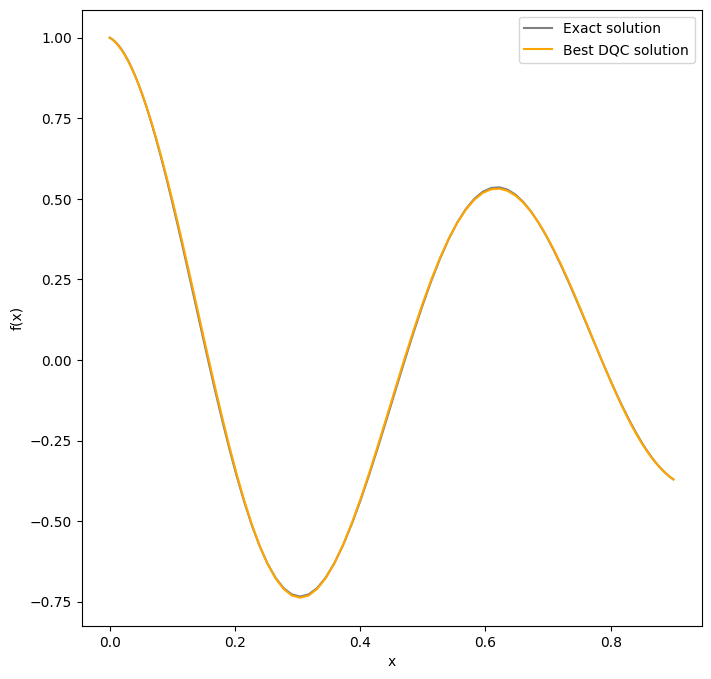

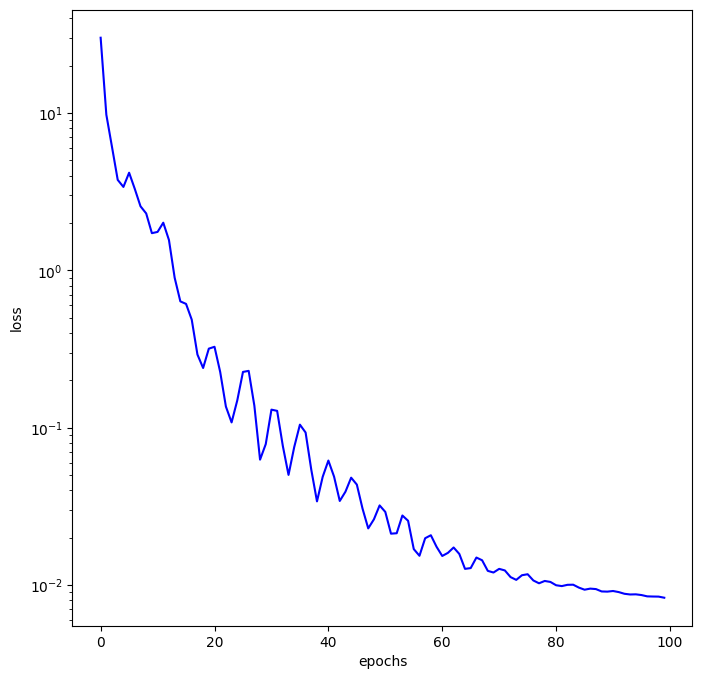


Top 10 indices (sorted by L_q): 
1. Index 9, L_f = 0.008315, L_q = 0.000017
2. Index 4, L_f = 0.010179, L_q = 0.000021
3. Index 7, L_f = 0.008802, L_q = 0.000023
4. Index 6, L_f = 0.018546, L_q = 0.000038
5. Index 0, L_f = 0.016319, L_q = 0.000044
6. Index 3, L_f = 0.021480, L_q = 0.000047
7. Index 1, L_f = 0.037580, L_q = 0.000074
8. Index 8, L_f = 0.032188, L_q = 0.000082
9. Index 2, L_f = 0.038497, L_q = 0.000087
10. Index 5, L_f = 0.034144, L_q = 0.000091


In [6]:
# Step 1: Collect all entries
all_entries = [(i, L_f[i], L_q[i]) for i in range(len(L_q))]

# Step 2: Sort by L_q only
top_10 = sorted(all_entries, key=lambda x: x[2])[:10]

# Step 3: Use the best one (lowest L_q) for plotting
best_index = top_10[0][0]
best_L_f = top_10[0][1]
best_L_q = top_10[0][2]
best_solution = all_functions[best_index]
best_loss = all_losses[best_index]

plt.figure(figsize=(8, 8))
plt.plot(x_data, analytic_sol.flatten(), color="gray", label="Exact solution")
plt.plot(x_data, best_solution.flatten(), color="orange", label="Best DQC solution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.savefig(f"best_f_x.png")
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(best_loss, color="blue")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log')
plt.savefig(f"best_losses.png")
plt.show()

# Print top 10 indices
print("\nTop 10 indices (sorted by L_q): ")
for rank, (i, lf, lq) in enumerate(top_10, 1):
    print(f"{rank}. Index {i}, L_f = {lf:.6f}, L_q = {lq:.6f}")

### Mean solution

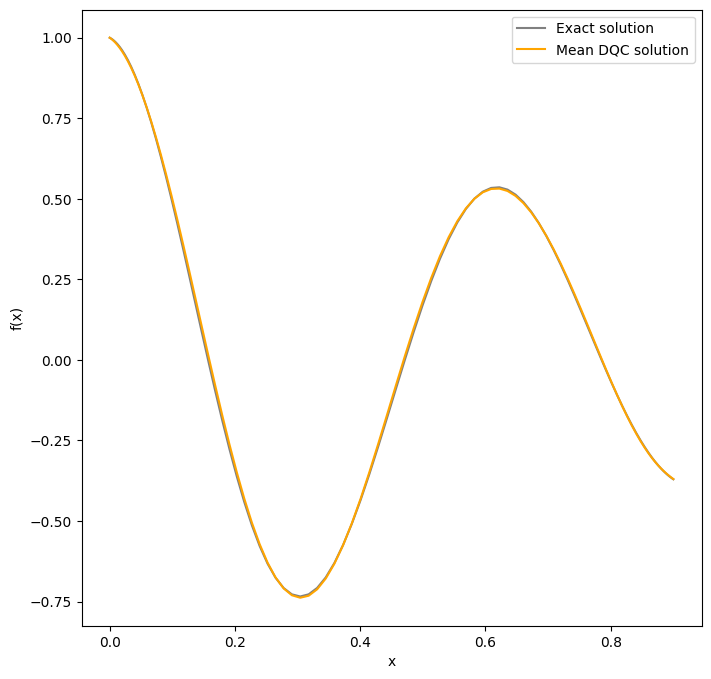

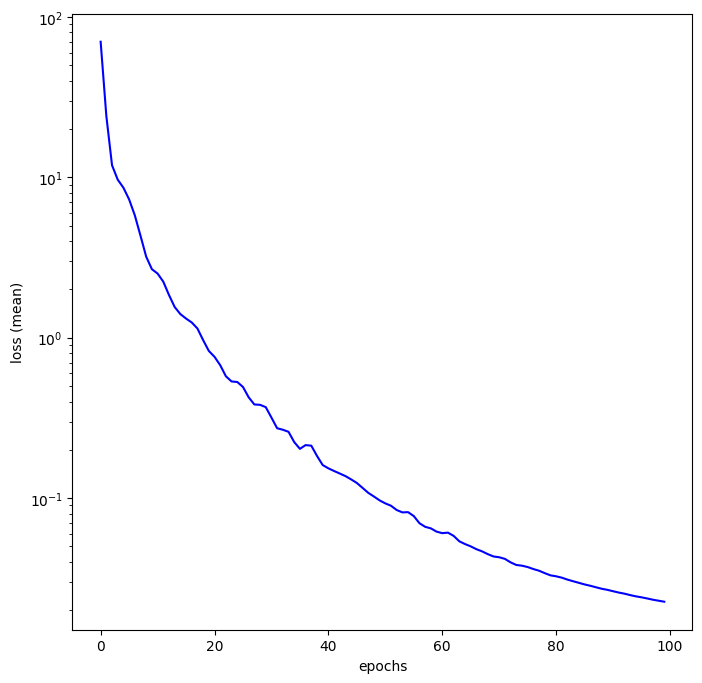

Preds std:  0.0032050101281687576
Mean L_f:  0.02260509801127896
Mean L_q:  5.22171862408144e-05


In [7]:
mean_loss = np.mean(all_losses, axis=0)
mean_solution = np.mean(all_functions, axis=0)
mean_L_f = np.mean(L_f, axis=0)
mean_L_q = np.mean(L_q, axis=0)

plt.figure(figsize=(8, 8))
plt.plot(x_data, analytic_sol.flatten(), color="gray", label="Exact solution")
plt.plot(x_data, mean_solution.flatten(), color="orange", label="Mean DQC solution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.savefig("mean_f_x.png")
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(mean_loss, color="blue")
plt.xlabel("epochs")
plt.ylabel("loss (mean)")
plt.yscale('log')
plt.savefig("mean_losses.png")
plt.show()

print("Preds std: ",np.sqrt(np.mean(np.std(all_functions, axis=0)**2)))
print("Mean L_f: ",mean_L_f)
print("Mean L_q: ",mean_L_q)

### Stats

In [8]:
L_f_threshold = 10**(-1)
L_q_threshold = 10**(-4) 
count = sum(1 for f, q in zip(L_f, L_q) if f < L_f_threshold and q < L_q_threshold)

print("Number of good solutions: ",count) 

Number of good solutions:  10


In [9]:
print("Number of good L_f: ",sum(1 for f in L_f if f < L_f_threshold)) 
print("Number of good L_q: ",sum(1 for q in L_q if q < L_q_threshold))

Number of good L_f:  10
Number of good L_q:  10
